In [1]:
# import packages
import skimage.io as io
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Load the left and right image

In [2]:
img_l = io.imread('Bicycle1-perfect/im0.png')
img_r = io.imread('Bicycle1-perfect/im1.png')

Scanline

In [13]:
x_0 = 1000
y_0 = 1000
block_size = 15
disparity_range = np.arange(-20,20)
dist = []
for i in disparity_range:

    print(i)
    break

i=150
rolled = np.roll(img_r, i, axis=1)
rolled = rolled[:, i:]
rolled = rolled.pad
diff = img_l - rolled
plt.imshow(rolled)
plt.show()

-20


ValueError: operands could not be broadcast together with shapes (2008,2988,3) (2008,2838,3) 

In [32]:
def draw_unary(axarr, unary):
    for i in range(unary.shape[-1]):
        axarr[i].set_title("unary term #%i" % i)
        bm = axarr[i].imshow(unary[:, :, i], cmap="gray", interpolation="nearest")
        plt.colorbar(bm, ax=axarr[i])
        # plt.contour(annot, colors='r')

import os
import gco

from gco import cut_grid_graph_simple

ImportError: cannot import name 'cut_grid_graph_simple' from 'gco' (c:\Users\Admin\anaconda3\Lib\site-packages\gco\__init__.py)

AttributeError: module 'gco' has no attribute 'cut_grid_graph_simple'

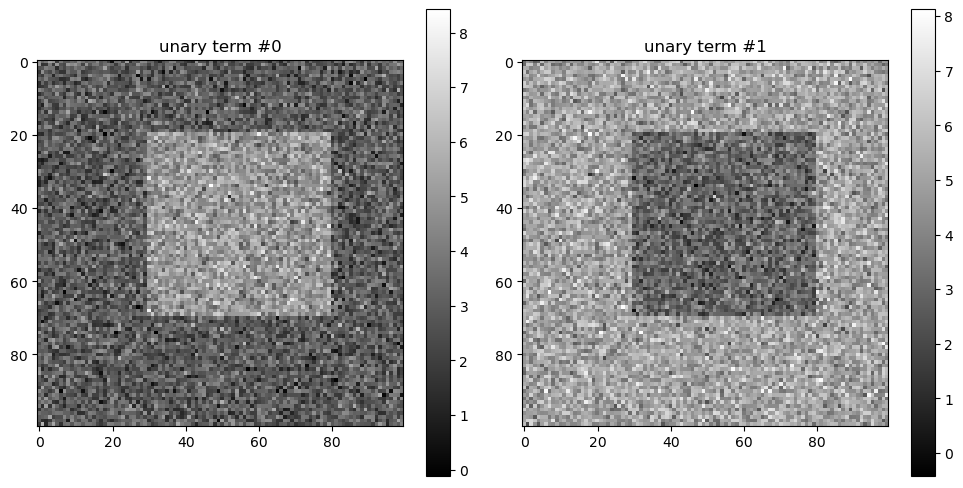

In [30]:
PLOT_SIZE = 5
""" """
annot = np.zeros((100, 100))
annot[20:70, 30:80] = 1
np.random.seed(0)
img = np.random.randn(*annot.shape)
img += 2 * annot - 1

# !!! Be careful when doing this concatenation,
# it seems 'c_' does not create a copy
# u = np.c_[img.flatten().copy(), - img.flatten().copy()]

unary = np.tile(img[:, :, np.newaxis], [1, 1, 2])
unary[:, :, 0] = img
unary[:, :, 1] = -img
unary += 4

fig, axarr = plt.subplots(ncols=unary.shape[-1], figsize=(unary.shape[-1] * PLOT_SIZE, PLOT_SIZE))
draw_unary(axarr, unary)
fig.tight_layout()

# edges, edge_weights = get_uniform_smoothness_pw_single_image(img.shape)
smooth = 1 - np.eye(2)

# y = pygco.cut_grid_graph_simple(unary, pw_cost*0, n_iter=-1)
# labels = pygco.cut_grid_graph_simple(unary_new + np.random.
#   randn(unary.shape[0], unary.shape[1], unary.shape[2])*0,
#   pw_cost*0, n_iter=-1)

labels = gco.cut_grid_graph_simple(unary, smooth, n_iter=-1)
labels_0 = gco.cut_grid_graph_simple(unary, smooth * 0.0, n_iter=-1)

fig, axarr = plt.subplots(ncols=3, figsize=(3 * PLOT_SIZE, PLOT_SIZE))
axarr[0].set_title("image")
axarr[0].imshow(img, cmap="gray", interpolation="nearest")
axarr[0].contour(annot, colors="r")
axarr[1].set_title("labeling (smooth=1)")
axarr[1].imshow(labels.reshape(*annot.shape), interpolation="nearest")
axarr[1].contour(annot, colors="w")
axarr[2].set_title("labeling (smooth=0)")
axarr[2].imshow(labels_0.reshape(*annot.shape), interpolation="nearest")
axarr[2].contour(annot, colors="w")
fig.tight_layout()
fig.savefig(os.path.join(DIR_IMAGES, "binary_labels-4conn.png")), plt.close()

labels = gco.cut_grid_graph_simple(unary, smooth, connect=8, n_iter=-1)
labels_0 = gco.cut_grid_graph_simple(unary, smooth * 0.0, connect=8, n_iter=-1)

fig, axarr = plt.subplots(ncols=3, figsize=(3 * PLOT_SIZE, PLOT_SIZE))
axarr[0].set_title("image")
axarr[0].imshow(img, cmap="gray", interpolation="nearest")
axarr[0].contour(annot, colors="r")
axarr[1].set_title("labeling (smooth=1)")
axarr[1].imshow(labels.reshape(*annot.shape), interpolation="nearest")
axarr[1].contour(annot, colors="w")
axarr[2].set_title("labeling (smooth=0)")
axarr[2].imshow(labels_0.reshape(*annot.shape), interpolation="nearest")
axarr[2].contour(annot, colors="w")
fig.tight_layout()
fig.savefig(os.path.join(DIR_IMAGES, "binary_labels-8conn.png")), plt.close()